<a href="https://colab.research.google.com/github/jpradeesh3800/ml/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
!pip install tensorflow==2.0.0-beta1

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(train_data,train_labels),(test_data,test_labels) = tf.keras.datasets.cifar10.load_data()

In [93]:
print("Training data size",train_data.shape)
print("Test data size",test_data.shape)

Training data size (50000, 32, 32, 3)
Test data size (10000, 32, 32, 3)


In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [95]:
sorted(pd.Series(np.squeeze(train_labels)).unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

horse


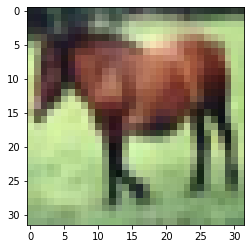

In [96]:
i=7
plt.imshow(train_data[i])
print(class_names[train_labels[i][0]])

In [97]:
lis = np.random.randint(0,50000,(5,5))
lis

array([[ 3995, 37016, 22525, 19714, 15012],
       [ 7223, 36800, 36579, 46371, 34950],
       [44853, 13378, 19275,  8210, 24173],
       [25398, 13394, 27237, 11786, 22111],
       [16634, 32132, 39133,  2605,  2443]])

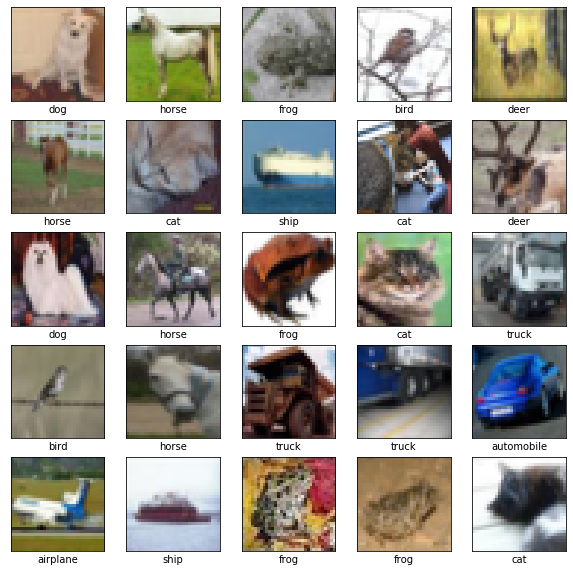

In [98]:
plt.figure(figsize=(10,10))

for i in range(5):
    for j in range(5):
        plt.subplot(5,5,5*i+j+1)
        plt.imshow(train_data[lis[i,j]])
        # print(class_names[train_labels[lis[i,j]][0]])
        plt.xlabel(class_names[train_labels[lis[i,j]][0]])
        plt.xticks([])
        plt.yticks([])
plt.show()

In [99]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                             tf.keras.layers.MaxPooling2D((2,2)),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D((2,2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(10,activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(train_data,train_labels,epochs=10,batch_size=128)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 14.5066 - accuracy: 0.0999
Epoch 2/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 14.5063 - accuracy: 0.1000
Epoch 3/10
10624/50000 [=====>........................] - ETA: 42s - loss: 14.4750 - accuracy: 0.1019

KeyboardInterrupt: ignored

*Accuracy is not being improved. What is missing??*

In [0]:
train_data,test_data = (train_data/255.0,test_data/255.0)

*Feautre Scaling and normalization is important before training the model*

*As soon as visualization of data is over,we can apply feature scaling*

*Best values for batch size is multiples of 2. Default value of batch_size is 32*


In [101]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                             tf.keras.layers.MaxPooling2D((2,2)),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D((2,2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(10,activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(train_data,train_labels,epochs=10,batch_size=128)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.5860 - accuracy: 0.4331
Epoch 2/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.2124 - accuracy: 0.5719
Epoch 3/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.0772 - accuracy: 0.6206
Epoch 4/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.9919 - accuracy: 0.6528
Epoch 5/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.9269 - accuracy: 0.6778
Epoch 6/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.8710 - accuracy: 0.6973
Epoch 7/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.8243 - accuracy: 0.7132
Epoch 8/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.7781 - accuracy: 0.7298
Epoch 9/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.7370 - accuracy: 0.7445
Epoch 10/10
50

In [102]:
results = model.evaluate(test_data,test_labels)
for i in zip(model.metrics_names,results):
    print("{:20s}:{}".format(*i))

10000/10000 [==============================] - 4s 414us/sample - loss: 0.9364 - accuracy: 0.6817
loss                :0.9363840159416199
accuracy            :0.6816999912261963


*Training is less.This can be resolved by training a bigger network and for more epochs*

*Testing accuracy much less than training accuracy.This can be resolved by using regularization(dropout,L2)*

In [104]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.MaxPooling2D((2,2)),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.MaxPooling2D((2,2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(10,activation='softmax'),
])

model.compile(
    optimizer='adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(train_data,train_labels,epochs=25,batch_size=128,validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/25
35000/35000 [==============================] - 57s 2ms/sample - loss: 1.6306 - accuracy: 0.4119 - val_loss: 1.5215 - val_accuracy: 0.4961
Epoch 2/25
35000/35000 [==============================] - 57s 2ms/sample - loss: 1.2789 - accuracy: 0.5444 - val_loss: 1.3195 - val_accuracy: 0.5791
Epoch 3/25
35000/35000 [==============================] - 57s 2ms/sample - loss: 1.1571 - accuracy: 0.5935 - val_loss: 1.2531 - val_accuracy: 0.6069
Epoch 4/25
35000/35000 [==============================] - 57s 2ms/sample - loss: 1.0687 - accuracy: 0.6245 - val_loss: 1.1942 - val_accuracy: 0.6167
Epoch 5/25
35000/35000 [==============================] - 57s 2ms/sample - loss: 1.0124 - accuracy: 0.6454 - val_loss: 1.1502 - val_accuracy: 0.6275
Epoch 6/25
35000/35000 [==============================] - 57s 2ms/sample - loss: 0.9599 - accuracy: 0.6637 - val_loss: 1.1587 - val_accuracy: 0.6236
Epoch 7/25
35000/35000 [==============================] 

In [105]:
results = model.evaluate(test_data,test_labels)
for i in zip(model.metrics_names,results):
    print("{:20s}:{}".format(*i))

10000/10000 [==============================] - 5s 507us/sample - loss: 0.8826 - accuracy: 0.7024
loss                :0.8825863121986389
accuracy            :0.7024000287055969


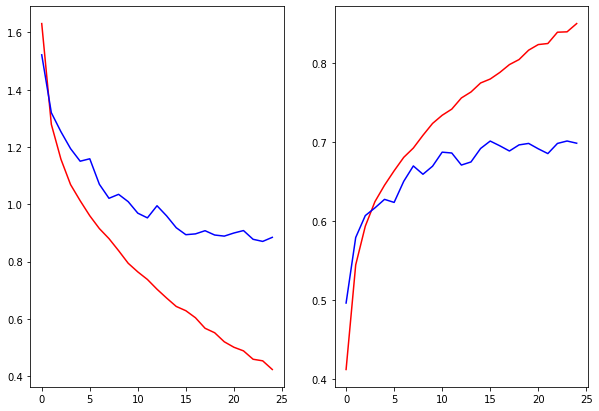

In [106]:
hist = history.history
hist['epochs'] = history.epoch

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.plot(hist['epochs'],hist['loss'],color='r')
plt.plot(hist['epochs'],hist['val_loss'],color='b')

plt.subplot(1,2,2)
plt.plot(hist['epochs'],hist['accuracy'],color='r')
plt.plot(hist['epochs'],hist['val_accuracy'],color='b')

plt.show()

*Testing accuracy is still less than train accuracy. So Dropout rate can be increased*

In [107]:
model = tf.keras.Sequential([
                             
                             tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3)),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.MaxPooling2D((2,2)),

                             tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.MaxPooling2D((2,2)),

                             tf.keras.layers.Flatten(),

                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dropout(0.5),

                             tf.keras.layers.Dense(10,activation='softmax'),
])

model.compile(
    optimizer='adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(train_data,train_labels,epochs=25,batch_size=128,validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/25
35000/35000 [==============================] - 75s 2ms/sample - loss: 1.8477 - accuracy: 0.3220 - val_loss: 1.7880 - val_accuracy: 0.4875
Epoch 2/25
35000/35000 [==============================] - 74s 2ms/sample - loss: 1.5389 - accuracy: 0.4402 - val_loss: 1.6472 - val_accuracy: 0.5283
Epoch 3/25
35000/35000 [==============================] - 74s 2ms/sample - loss: 1.4150 - accuracy: 0.4888 - val_loss: 1.5147 - val_accuracy: 0.5665
Epoch 4/25
35000/35000 [==============================] - 74s 2ms/sample - loss: 1.3443 - accuracy: 0.5162 - val_loss: 1.4774 - val_accuracy: 0.5899
Epoch 5/25
35000/35000 [==============================] - 74s 2ms/sample - loss: 1.2832 - accuracy: 0.5428 - val_loss: 1.3958 - val_accuracy: 0.6244
Epoch 6/25
35000/35000 [==============================] - 74s 2ms/sample - loss: 1.2299 - accuracy: 0.5594 - val_loss: 1.3450 - val_accuracy: 0.6325
Epoch 7/25
35000/35000 [==============================] 

In [108]:
results = model.evaluate(test_data,test_labels)
for i in zip(model.metrics_names,results):
    print("{:20s}:{}".format(*i))

10000/10000 [==============================] - 5s 543us/sample - loss: 1.0199 - accuracy: 0.6882
loss                :1.0198638565063476
accuracy            :0.6881999969482422


*In the above model, Train and test accuracy are similar. To improve the model,No of epochs can be increased.*

In [109]:
type(history.history)

dict

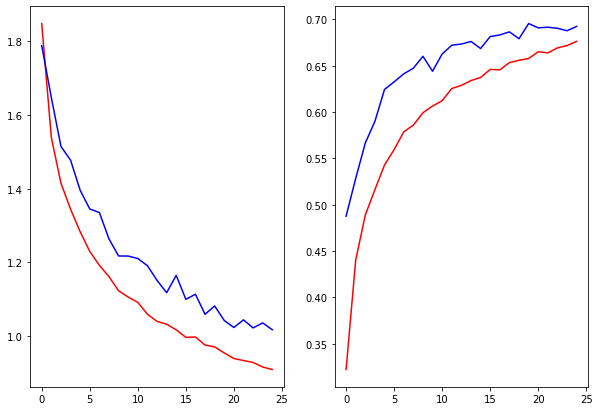

In [110]:
hist = history.history
hist['epochs'] = history.epoch

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.plot(hist['epochs'],hist['loss'],color='r')
plt.plot(hist['epochs'],hist['val_loss'],color='b')

plt.subplot(1,2,2)
plt.plot(hist['epochs'],hist['accuracy'],color='r')
plt.plot(hist['epochs'],hist['val_accuracy'],color='b')

plt.show()